In [1]:
from lightkurve import search_targetpixelfile

In [2]:
tpfs = search_targetpixelfile("Kepler-452b").download_all()

#tpf.plot(scale='log')

In [3]:
lclist = {}
for ii, tpf in enumerate(tpfs):
    lclist[ii] = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
    if ii==0:
        lc = lclist[ii]
        continue
    lc = lc.append(lclist[ii])

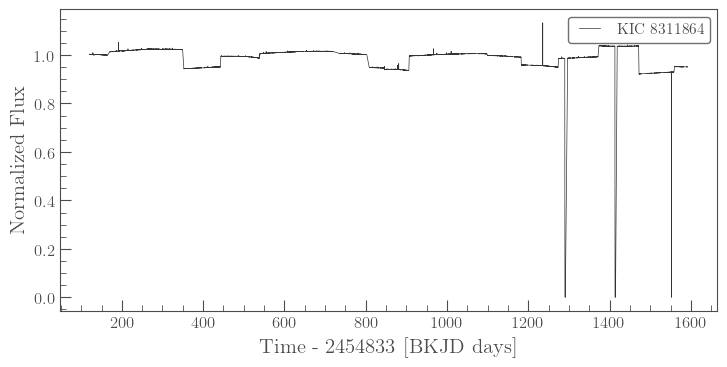

In [4]:
lc.plot()

In [5]:
flat, trend = lc.flatten(window_length=101, return_trend=True)

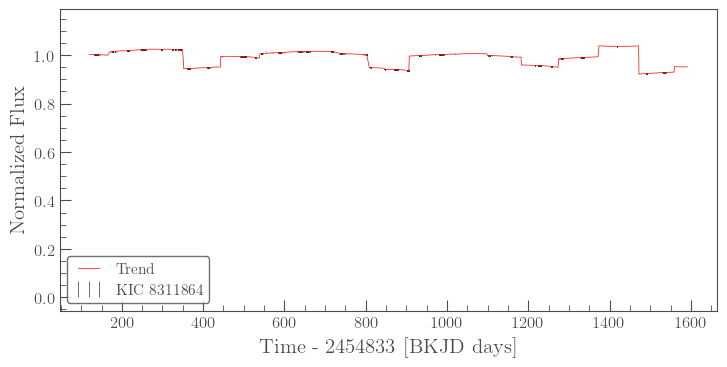

In [6]:
ax = lc.errorbar()                              # plot() returns a matplotlib axes ...
trend.plot(ax=ax, color='red', label='Trend');  # which we can pass to the next plot() to use the same axes

(0.999, 1.001)

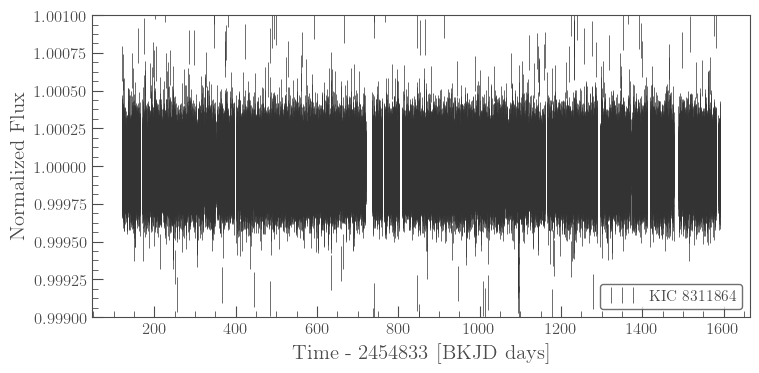

In [7]:
ax = flat.errorbar();

#ax.set_xlim(670,730)
ax.set_ylim(0.999,1.001)

(0.9999, 1.0001)

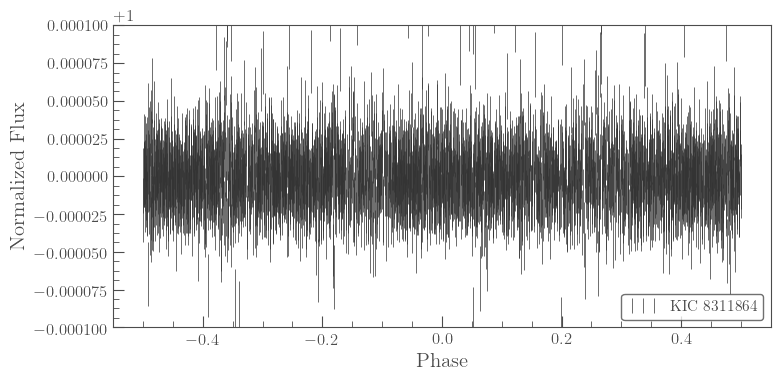

In [17]:
ax = flat.bin(binsize=30).fold(384.843).errorbar();

#ax.set_xlim(670,730)
ax.set_ylim(0.9999,1.0001)

In [ ]:
flatbin = flat.bin(binsize=3)
ax = flatbin.errorbar();
ax.set_xlim(697.5,702.5)
ax.set_ylim(0.9995,1.0005)
ax.axvline(699.8171)
ax.axhline(1)